# ****Instalação de dependencias****

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!sudo apt install build-essential libpoppler-cpp-dev pkg-config python3-dev -q

Reading package lists...
Building dependency tree...
Reading state information...
build-essential is already the newest version (12.4ubuntu1).
pkg-config is already the newest version (0.29.1-0ubuntu2).
libpoppler-cpp-dev is already the newest version (0.62.0-2ubuntu2.12).
python3-dev is already the newest version (3.6.7-1~18.04).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [16]:
!pip install pdftotext -q
!pip install wordcloud -q

# **Importando as bibliotecas**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pdftotext
import nltk
import glob

In [42]:
#Instanciando stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
# Adicionar mais palavras ao stopwords criado, verificando se já existe
new_stopwords = ['art', 'trf5', 'pje', 'jfpe', 'pje1', 'https', 'jus', 'br', 
                 'pág', 'listView','seam', 'pje1g', 'eletronicamente']
print(len(stopwords))
for word in new_stopwords:
  if word not in stopwords:
    stopwords.append(word)
print(len(stopwords))

204
217


# **Importando os documentos de petição inicial**


In [44]:
lista_arquivos = []



In [47]:
for arquivo in glob.glob(r'/content/drive/MyDrive/Colab Notebooks/projeto_jfpe/wordcloud/peticoes/*pdf'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)



In [48]:
lista_arquivos

['/content/drive/MyDrive/Colab Notebooks/projeto_jfpe/wordcloud/peticoes/AÇÃO PREVIDENCIÁRIA DE CONCESSÃO DE BENEFÍCIO POR INCAPACIDADE.pdf',
 '/content/drive/MyDrive/Colab Notebooks/projeto_jfpe/wordcloud/peticoes/Petição inicial.pdf',
 '/content/drive/MyDrive/Colab Notebooks/projeto_jfpe/wordcloud/peticoes/PETIÇÃO INICIAL- SALÁRIO MATERNIDADE.pdf',
 '/content/drive/MyDrive/Colab Notebooks/projeto_jfpe/wordcloud/peticoes/Petição inicial audiência.pdf',
 '/content/drive/MyDrive/Colab Notebooks/projeto_jfpe/wordcloud/peticoes/MARIA JOSÉ SILVA DOS SANTOS - JUDICIAL- AP. POR IDADE RURAL.pdf',
 '/content/drive/MyDrive/Colab Notebooks/projeto_jfpe/wordcloud/peticoes/0002101-91.2022.4.05.8300 - REVISÃO DE APOSENTADORIA.pdf',
 '/content/drive/MyDrive/Colab Notebooks/projeto_jfpe/wordcloud/peticoes/inicial 2.pdf',
 '/content/drive/MyDrive/Colab Notebooks/projeto_jfpe/wordcloud/peticoes/0000609-40.2022.4.05.8308.pdf',
 '/content/drive/MyDrive/Colab Notebooks/projeto_jfpe/wordclou

In [49]:
len(lista_arquivos)

15

# **Gerando uma Word Cloud**

In [56]:
# concatenando os textos em formato string em uma unica variável
result = ''
for peticao in lista_arquivos:
  with open(peticao, "rb") as f:
    pdf = pdftotext.PDF(f)
  for page in pdf:
    result += page
  

In [59]:
# Gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=1600, height=800).generate(result)

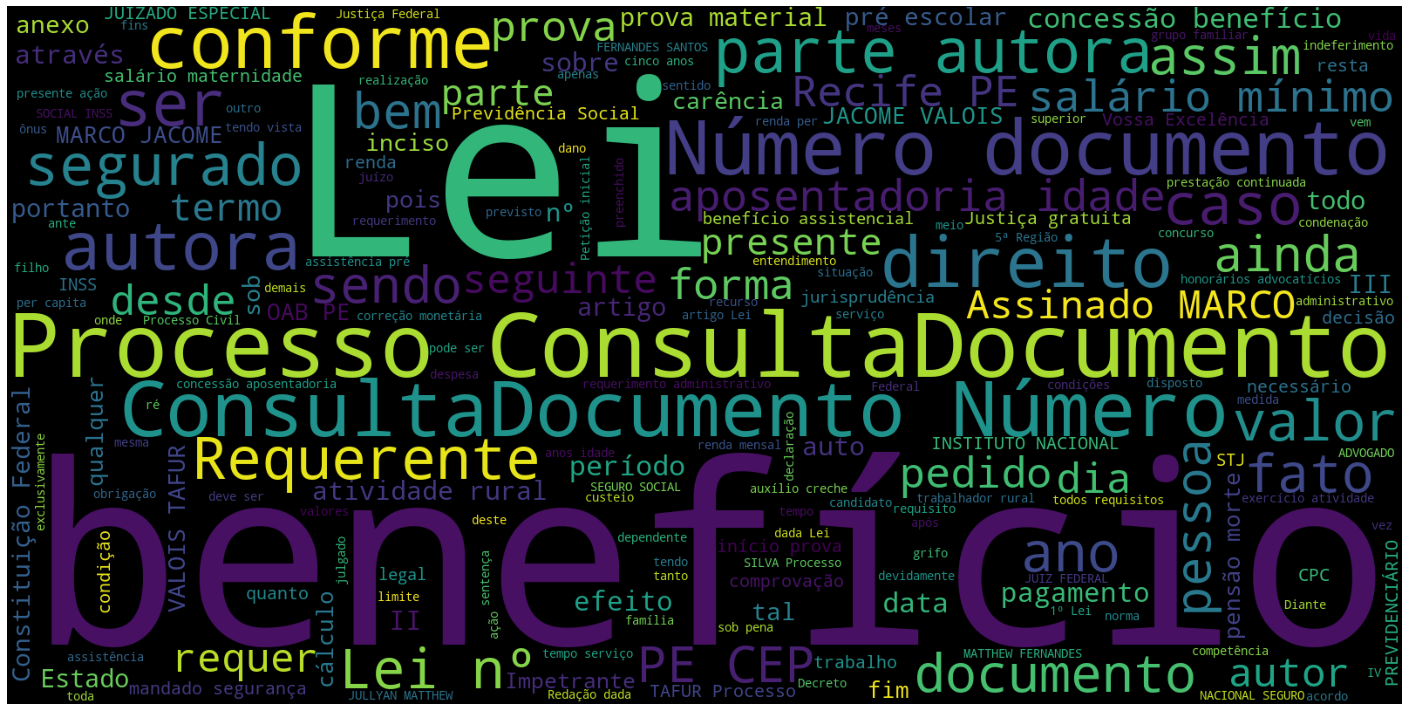

In [60]:
# mostrar imagem final
fig, ax = plt.subplots(figsize= (25, 15))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("text_wordcloud.png")